    TITLE                                         TESTING THE MODEL


    TEAM ID                                       PNT2022TMID05115

In [19]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [20]:
pwd

'/content/drive/MyDrive'

In [21]:
!unzip TRAIN_SET.zip

Archive:  TRAIN_SET.zip
replace TRAIN_SET/APPLES/0_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: TRAIN_SET/APPLES/0_100.jpg  
  inflating: TRAIN_SET/APPLES/1_100.jpg  
  inflating: TRAIN_SET/APPLES/10_100.jpg  
  inflating: TRAIN_SET/APPLES/100_100.jpg  
  inflating: TRAIN_SET/APPLES/101_100.jpg  
  inflating: TRAIN_SET/APPLES/102_100.jpg  
  inflating: TRAIN_SET/APPLES/103_100.jpg  
  inflating: TRAIN_SET/APPLES/104_100.jpg  
  inflating: TRAIN_SET/APPLES/105_100.jpg  
  inflating: TRAIN_SET/APPLES/106_100.jpg  
  inflating: TRAIN_SET/APPLES/107_100.jpg  
  inflating: TRAIN_SET/APPLES/108_100.jpg  
  inflating: TRAIN_SET/APPLES/109_100.jpg  
  inflating: TRAIN_SET/APPLES/11_100.jpg  
  inflating: TRAIN_SET/APPLES/110_100.jpg  
  inflating: TRAIN_SET/APPLES/111_100.jpg  
  inflating: TRAIN_SET/APPLES/112_100.jpg  
  inflating: TRAIN_SET/APPLES/113_100.jpg  
  inflating: TRAIN_SET/APPLES/114_100.jpg  
  inflating: TRAIN_SET/APPLES/115_100.jpg  
  inflating: TRAIN_SET/APP

In [22]:
!unzip TEST_SET.zip

Archive:  TEST_SET.zip
replace TEST_SET/APPLES/r_106_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: TEST_SET/APPLES/r_106_100.jpg  
  inflating: TEST_SET/APPLES/r_105_100.jpg  
  inflating: TEST_SET/APPLES/r_27_100.jpg  
  inflating: TEST_SET/APPLES/r_29_100.jpg  
  inflating: TEST_SET/APPLES/r_23_100.jpg  
  inflating: TEST_SET/APPLES/r_183_100.jpg  
  inflating: TEST_SET/APPLES/r_184_100.jpg  
  inflating: TEST_SET/APPLES/r_26_100.jpg  
  inflating: TEST_SET/APPLES/r_16_100.jpg  
  inflating: TEST_SET/APPLES/r_120_100.jpg  
  inflating: TEST_SET/APPLES/r_18_100.jpg  
  inflating: TEST_SET/APPLES/r_25_100.jpg  
  inflating: TEST_SET/APPLES/r_112_100.jpg  
  inflating: TEST_SET/APPLES/r_28_100.jpg  
  inflating: TEST_SET/APPLES/r_14_100.jpg  
  inflating: TEST_SET/APPLES/r_111_100.jpg  
  inflating: TEST_SET/APPLES/r_17_100.jpg  
  inflating: TEST_SET/APPLES/r_19_100.jpg  
  inflating: TEST_SET/APPLES/r_30_100.jpg  
  inflating: TEST_SET/APPLES/r_13_100.jpg  
  inflating

Image Augumentation

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator#scaling,zooming

In [24]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=True)

In [25]:
test_datagen=ImageDataGenerator(rescale=1./255)

Applying Image DataGenerator functionality to Training set and Testing set

In [26]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/TRAIN_SET",target_size=(64,64),color_mode='rgb',class_mode="sparse")

Found 2626 images belonging to 5 classes.


In [27]:
x_test = test_datagen.flow_from_directory(
r'/content/drive/MyDrive/TEST_SET',
target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 1055 images belonging to 5 classes.


In [28]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [29]:
x_test.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [30]:
from collections import Counter as c

In [31]:
c(x_train.labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

Model Building And Testing

In [32]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

In [7]:
model=Sequential()

In [8]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [9]:
model.add(Conv2D(32, (3, 3), activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

Compiling the Model

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fitting The Model

In [33]:
len(x_train)

83

In [34]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
83/83 [==============================] - 26s 300ms/step - loss: 0.4034 - accuracy: 0.8545 - val_loss: 0.0911 - val_accuracy: 0.9545
Epoch 2/10
83/83 [==============================] - 24s 285ms/step - loss: 0.0236 - accuracy: 0.9958 - val_loss: 0.0259 - val_accuracy: 0.9867
Epoch 3/10
83/83 [==============================] - 23s 277ms/step - loss: 0.0108 - accuracy: 0.9973 - val_loss: 0.0212 - val_accuracy: 0.9886
Epoch 4/10
83/83 [==============================] - 26s 315ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0173 - val_accuracy: 0.9867
Epoch 5/10
83/83 [==============================] - 24s 292ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0307 - val_accuracy: 0.9820
Epoch 6/10
83/83 [==============================] - 24s 285ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 7/10
83/83 [==============================] - 23s 281ms/step - loss: 0.1271 - accuracy: 0.9676 - val_loss: 0.0822 - val_accuracy: 0.9725

Saving the Model

In [35]:
model.save('train.h5')

In [36]:
model.save('dataset.h5')

In [37]:
model.save('fruits.h5')

In [39]:
from tensorflow.keras.models import load_model

In [40]:
model=load_model('train.h5')

In [41]:
model=load_model('dataset.h5')

In [42]:
model=load_model('fruits.h5')


In [43]:
!tar zcvf nutrition-classification-model.tgz nutrition.h5

nutrition.h5


In [45]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 6.8 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 132 kB 48.9 MB/s 
     |████████████████████████████████| 9.9 MB 43.9 MB/s 
     |████████████████████████████████| 79 kB 5.9 MB/s 
     |████████████████████████████████| 140 kB 40.3 MB/s 
     |████████████████████████████████| 956 kB 56.4 MB/s 
     |████████████████████████████████| 135 kB 47.1 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=5ef325e0080dc919eb3bf73ba30eb0f8fb9da672f4ea6173419ebe44a26c8cdd
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=7a56804b06a

In [46]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.1 MB/s 
     |████████████████████████████████| 51 kB 592 kB/s 
     |████████████████████████████████| 824 kB 44.0 MB/s 
     |████████████████████████████████| 133 kB 51.9 MB/s 
     |████████████████████████████████| 547 kB 61.3 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=ff6074c02a331ea56ac21e75c86df26665ff8b97a69c9653c48d552e58585cd8
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=04da7710e5596e5e47bfb961363cfb02e40555f887d06d0f07e7077bb80f272f
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [47]:
from ibm_watson_machine_learning import APIClient

In [48]:
wml_credentials = {
    "url" : "https://eu-de.ml.cloud.ibm.com",
    "apikey" : "V8hik2Q5eS1s_K8jZ72O5X-READkcQBr_qVGtJ37by5j"
    
}

In [49]:
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [50]:
client

In [51]:
client.spaces.list(50)

------------------------------------  ---------  ------------------------
ID                                    NAME       CREATED
34050180-23c9-44f5-8800-32db49349e5d  nutrition  2022-11-11T07:33:27.438Z
------------------------------------  ---------  ------------------------


In [52]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-de:a/eb0a09c9a4b84a999a2f55a11273104a:7ddc9f3b-3f88-47f7-82c4-59fe493c461f::',
      'guid': '7ddc9f3b-3f88-47f7-82c4-59fe493c461f',
      'name': 'Watson Machine Learning-os',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'nutrition',
    'scope': {'bss_account_id': 'eb0a09c9a4b84a999a2f55a11273104a'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'ef20fd22-5bbb-4e1f-840c-128c3bf226a3',
      'bucket_region': 'eu-de-standard',
      'credentials': {'admin': {'access_key_id': '2a55175802a843b58a5529fa9bf1fd8a',
        'api_key': 'uHZ8wcSXEZjqA8Zi_OcEBcAPiL-3RkouH-EJg5z3V6Ou',
        'secret_access_key': 'f637c4cfc6d8d2ab36bf9a7524bc072a17fff7fd8b416452',
        'service_id': 'ServiceId-8f67a74b-c424-47f3-a2bd-75966467fee3'},
       'editor': {'access_key_id': '6b54460b839b47d8bdecefd6d1b7685e',
        'api_key

In [53]:
space_uid="34050180-23c9-44f5-8800-32db49349e5d"

In [54]:
client.set.default_space(space_uid)

'SUCCESS'

In [55]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [56]:
# setting up the tensorflow python
software_space_uid= client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")

In [57]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [58]:
model_details = client.repository.store_model(model = "nutrition-classification-model.tgz",meta_props={
    client.repository.ModelMetaNames.NAME : "CNN Model",
    client.repository.ModelMetaNames.TYPE : "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : "acd9c798-6974-5d2f-a657-ce06e986df4d"
    })

In [59]:
model_id= client.repository.get_model_id(model_details)

In [60]:
model_id

'6072620c-e75f-486c-b18e-02d8aa64f3df'

In [61]:
client.repository.download(model_id,'nutrition.tar.biz')

Successfully saved model content to file: 'nutrition.tar.biz'


'/content/drive/MyDrive/nutrition.tar.biz'

In [62]:
from flask import Flask,render_template,request
# Flask-It is our framework which we are going to use to run/serve our application.
#request-for accessing file which was uploaded by the user on our application.
import os
import numpy as np #used for numerical analysis
from tensorflow.keras.models import load_model#to load our trained model
from tensorflow.keras.preprocessing import image
import requests

In [63]:
app = Flask(__name__,template_folder="templates") # initializing a flask app
# Loading the model
model=load_model('nutrition.h5')
print("Loaded model from disk")

Loaded model from disk


In [64]:
@app.route('/')# route to display the home page
def home():
    return render_template('home.html')

In [65]:
@app.route('/image1',methods=['GET','POST'])# routes to the index html
def image1():
    return render_template("image.html")

In [66]:
@app.route('/predict',methods=['GET', 'POST'])# route to show the predictions in a web UI
def launches():
    if request.methods=='POST':
        f=request.files['file'] #requesting the file
        basepath=os.path.dirname('__file__')#storing the file directory
        filepath=os.path.join(basepath,"uploads",f.filename)#storing the file in uploads folder
        f.save(filepath)#saving the file
        img=image.load_img(filepath,target_size=(64,64)) #load and reshaping the image
        x=image.img_to_array(img)#converting image to an array
        x=np.expand_dims(x,axis=0)#changing the dimensions of the image
        pred=np.argmax(model.predict(x), axis=1)
        print("prediction",pred)#printing the prediction
        index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
        result=str(index[pred[0]])
        x=result
        print(x)
        result=nutrition(result)
        print(result)
        return render_template("0.html",showcase=(result))

In [67]:
pred = model.predict

In [68]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

211/211 [==============================] - 6s 27ms/step


In [69]:
index=['APPLE','BANANA','ORANGE','WATERMELON','PINEAPPLE']

In [70]:
result=str(index[classes_x[0]])

In [73]:
x=result
print(x)
result=nutrition(result)
print(result)

APPLE


NameError: ignored

In [74]:
import http.client

conn = http.client.HTTPSConnection("calorieninjas.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "e5805fbf62mshf8d7308c0600c2dp197087jsn93407e3cce35",
    'X-RapidAPI-Host': "calorieninjas.p.rapidapi.com"
    }

conn.request("GET", "/v1/nutrition?query=Apples", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apples", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.4, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 13.8}]}


In [75]:
import requests

url = "https://calorieninjas.p.rapidapi.com/v1/nutrition"

querystring = {"query":"apples"}

headers = {
	"X-RapidAPI-Key": "e5805fbf62mshf8d7308c0600c2dp197087jsn93407e3cce35",
	"X-RapidAPI-Host": "calorieninjas.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apples", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.4, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 13.8}]}


In [76]:
if __name__ == "__main__":
   # running the app
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


Testing the Model

In [78]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [79]:
model=load_model('fruits.h5')


In [80]:
model=load_model('train.h5')

In [81]:
model=load_model('dataset.h5')


In [82]:
img=image.load_img(r"/content/drive/MyDrive/TEST_SET/PINEAPPLE/125_100.jpg")

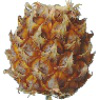

In [83]:
img

In [84]:
img=image.load_img(r"/content/drive/MyDrive/TEST_SET/PINEAPPLE/125_100.jpg",target_size=(64,64))

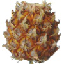

In [85]:
img

In [86]:
x=image.img_to_array(img)

In [87]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [88]:
x=np.expand_dims(x,axis=0)

In [89]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [90]:
pred = model.predict(x) 

1/1 [==============================] - 0s 114ms/step


In [91]:
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [92]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'PINEAPPLE'

In [93]:
img=image.load_img(r"/content/drive/MyDrive/TEST_SET/WATERMELON/125_100.jpg")

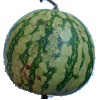

In [94]:
img

In [95]:
img=image.load_img(r"/content/drive/MyDrive/TEST_SET/WATERMELON/125_100.jpg",target_size=(64,64))

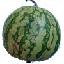

In [96]:
img

In [97]:
x=image.img_to_array(img)

In [98]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [99]:
x=np.expand_dims(x,axis=0)

In [100]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [101]:
pred = model.predict(x) 

1/1 [==============================] - 0s 25ms/step


In [102]:
pred

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [103]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

211/211 [==============================] - 5s 22ms/step


In [104]:
predict_x

array([[6.1787645e-12, 1.9314784e-07, 1.2124352e-06, 6.7884416e-06,
        9.9999177e-01],
       [4.4726257e-20, 1.0000000e+00, 1.3602040e-18, 1.7271543e-10,
        1.6605114e-08],
       [4.6303513e-19, 1.0000000e+00, 4.6983036e-18, 4.4376305e-10,
        5.0595621e-09],
       ...,
       [8.7085270e-15, 3.0773620e-08, 1.2600064e-08, 8.5691148e-08,
        9.9999988e-01],
       [4.6871643e-20, 1.0000000e+00, 1.3230555e-18, 1.4782831e-10,
        1.0153717e-08],
       [6.2216168e-05, 1.2786685e-05, 7.2663706e-06, 9.9991691e-01,
        8.8414606e-07]], dtype=float32)

In [105]:
classes_x

array([4, 1, 1, ..., 4, 1, 3])

In [106]:
x_test.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [107]:
index=['APPLE','BANANA','ORANGE','WATERMELON','PINEAPPLE']

In [108]:
result=str(index[classes_x[0]])

In [109]:
result

'PINEAPPLE'

In [110]:
from flask import Flask,render_template,request
# Flask-It is our framework which we are going to use to run/serve our application.
#request-for accessing file which was uploaded by the user on our application.
import os
import numpy as np #used for numerical analysis
from tensorflow.keras.models import load_model#to load our trained model
from tensorflow.keras.preprocessing import image
import requests

In [111]:
app = Flask(__name__,template_folder="templates") # initializing a flask app
# Loading the model
model=load_model('nutrition.h5')
print("Loaded model from disk")

Loaded model from disk


In [112]:
@app.route('/')# route to display the home page
def home():
    return render_template('home.html')

In [113]:
@app.route('/image1',methods=['GET','POST'])# routes to the index html
def image1():
    return render_template("image.html")

In [114]:
@app.route('/predict',methods=['GET', 'POST'])# route to show the predictions in a web UI
def launch():
    if request.methods=='POST':
        f=request.files['file'] #requesting the file
        basepath=os.path.dirname('__file__')#storing the file directory
        filepath=os.path.join(basepath,"uploads",f.filename)#storing the file in uploads folder
        f.save(filepath)#saving the file
        img=image.load_img(filepath,target_size=(64,64)) #load and reshaping the image
        x=image.img_to_array(img)#converting image to an array
        x=np.expand_dims(x,axis=0)#changing the dimensions of the image
        pred=np.argmax(model.predict(x), axis=1)
        print("prediction",pred)#printing the prediction
        index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
        result=str(index[pred[0]])
        x=result
        print(x)
        result=nutrition(result)
        print(result)
        return render_template("0.html",showcase=(result))

In [115]:
pred = model.predict

In [116]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

211/211 [==============================] - 7s 34ms/step


In [117]:
index=['APPLE','BANANA','ORANGE','WATERMELON','PINEAPPLE']

In [118]:

result=str(index[classes_x[0]])

In [119]:
x=result

In [120]:
print(x)

APPLE


In [121]:
print(result)

APPLE


In [122]:
import http.client

conn = http.client.HTTPSConnection("calorieninjas.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "e5805fbf62mshf8d7308c0600c2dp197087jsn93407e3cce35",
    'X-RapidAPI-Host': "calorieninjas.p.rapidapi.com"
    }

conn.request("GET", "/v1/nutrition?query=Apples", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apples", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.4, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 13.8}]}


In [123]:
import requests

url = "https://calorieninjas.p.rapidapi.com/v1/nutrition"

querystring = {"query":"apples"}

headers = {
	"X-RapidAPI-Key": "e5805fbf62mshf8d7308c0600c2dp197087jsn93407e3cce35",
	"X-RapidAPI-Host": "calorieninjas.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"items": [{"sugar_g": 10.3, "fiber_g": 2.4, "serving_size_g": 100.0, "sodium_mg": 1, "name": "apples", "potassium_mg": 11, "fat_saturated_g": 0.0, "fat_total_g": 0.2, "calories": 53.4, "cholesterol_mg": 0, "protein_g": 0.3, "carbohydrates_total_g": 13.8}]}


In [124]:
if __name__ == "__main__":
   # running the app
    app.run(debug=False)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
